In [23]:
import numpy as np
import scipy as sc
from scipy import special
import matplotlib.pyplot as plt
from numpy.lib.function_base import append

In [24]:
#Parameters

pi=np.pi
particle_diameter = 3e-6
radius = particle_diameter / 2

particle_density = 1191
fluid_density = 998

Xi = fluid_density/particle_density

speed_of_sound_fluid = 1495
speed_of_sound_particle_longitudinal = 2690
speed_of_sound_particle_shear = 1340

sigma = ((speed_of_sound_particle_longitudinal**2)/(speed_of_sound_particle_shear**2)-2)/((2*speed_of_sound_particle_longitudinal**2)/(speed_of_sound_particle_shear**2)-2)

#Helmholtz number

xcte = 2*pi*radius/speed_of_sound_fluid
x = np.linspace(1e6,300e6,1000)*xcte

xcte1 = 2*pi*radius/speed_of_sound_particle_longitudinal
x1 = np.linspace(1e6,300e6,1000)*xcte1

xcte2 = 2*pi*radius/speed_of_sound_particle_shear
x2 = np.linspace(1e6,300e6,1000)*xcte2

#Bessel functions

jnx1 = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  jnx1.append(np.array(sc.special.jn(i, x1)))

jnx2 = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  jnx2.append(np.array(sc.special.jn(i, x2)))

jnx = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  jnx.append(np.array(sc.special.jn(i, x)))

nnx = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  nnx.append(np.array(sc.special.yn(i, x)))

d1jnx1=[]
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]:    
 d1jnx1.append(np.array(i*jnx1[i]/x1)+np.array(-jnx1[(i+1)]))

d1jnx2=[]
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]:    
 d1jnx2.append(np.array(i*jnx2[i]/x2)+np.array(-jnx2[(i+1)]))

d1jnx=[]
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]:    
 d1jnx.append(np.array(i*jnx[i]/x)+np.array(-jnx[(i+1)]))

d1nnx=[]
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]:    
 d1nnx.append(np.array(i*nnx[i]/x)+np.array(-nnx[(i+1)]))

d2jnx1=[]
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:    
 d2jnx1.append(np.array(i/(x1*x1)*((x1*d1jnx1[i])-jnx1[i]))+np.array(-d1jnx1[(i+1)]))

d2jnx2=[]
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:    
 d2jnx2.append(np.array(i/(x2*x2)*((x2*d1jnx2[i])-jnx2[i]))+np.array(-d1jnx2[(i+1)]))

d2jnx=[]
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:    
 d2jnx.append(np.array(i/(x*x)*((x*d1jnx[i])-jnx[i]))+np.array(-d1jnx[(i+1)]))

#Acoustic radiation factor calculation

an = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:
  an.append(np.array(x1*d1jnx1[i]/((x1*d1jnx1[i])-jnx1[i])))

bn = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:
  bn.append(np.array(2*i*(i+1)*jnx2[i]/(((i+2)*(i-1)*jnx2[i])+(x2*x2*d2jnx2[i]))))

s = sigma/(1-(2*sigma))

cn = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:
  cn.append(np.array(x1*x1*((s*jnx1[i])-d2jnx1[i])/((x1*d1jnx1[i])-jnx1[i])))

dn = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:
  dn.append(np.array(2*i*(i+1)*(jnx2[i]-(x2*d1jnx2[i]))/(((i+2)*(i-1)*jnx2[i])+(x2*x2*d2jnx2[i]))
))
  
fn = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:
  fn.append(np.array(Xi*x2*x2/2*((an[i]-bn[i])/(cn[i]-dn[i]))))

en = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:
  en.append(np.array((fn[i]*jnx[i])-(x*d1jnx[i])))

gn = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:
  gn.append(np.array((fn[i]*nnx[i])-(x*d1nnx[i])))

alfan = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:
  alfan.append(np.array(-(en[i]*en[i])/((en[i]*en[i])+(gn[i]*gn[i]))))

betan = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:
  betan.append(np.array(-(en[i]*gn[i])/((en[i]*en[i])+(gn[i]*gn[i]))))

un = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:
  un.append(np.array(((1+alfan[i])*jnx[i])+(betan[i]*nnx[i])))

d1un = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:
  d1un.append(np.array(((1+alfan[i])*d1jnx[i])+(betan[i]*d1nnx[i])))

vn = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:
  vn.append(np.array(((betan[i]*jnx[i])-(alfan[i]*nnx[i]))))

d1vn = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:
  d1vn.append(np.array(((betan[i]*d1jnx[i])-(alfan[i]*d1nnx[i])))) 

w1 = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]:
  w1.append(np.array((i+1)*((d1vn[i]*d1un[(i+1)])-(d1un[i]*d1vn[(i+1)]))*x*x))

w2 = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]:
  w2.append(np.array(i*(i+1)*(i+2)*((vn[i]*un[(i+1)])-(un[i]*vn[(i+1)]))))

w3 = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]:
  w3.append(np.array(((i*(i+1)*((un[i]*d1vn[i+1])-(vn[i]*d1un[i+1]))) - ((i+1)*(i+2)*((d1un[i]*vn[i+1])-(d1vn[i]*un[i+1])))) * x
))
  
w4 = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]:
  w4.append(np.array(((i+1)*((vn[i]*un[i+1])-(un[i]*vn[i+1])))*x*x))

wf = np.array(np.array(w1)-np.array(w2)+np.array(w3)+np.array(w4))

wf = wf[0] + wf[1] + wf[2] + wf[3] + wf[4] + wf[5] + wf[6] + wf[7] + wf[8] + wf[9] + wf[10] + wf[11] + wf[12] + wf[13] + wf[14] + wf[15] + wf[16] + wf[17]

yfinal = 4/(x*x)*wf

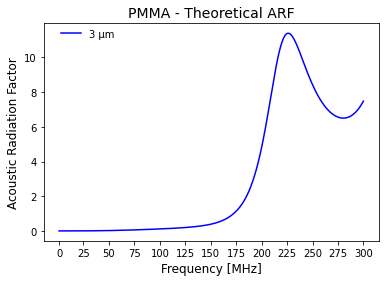

In [25]:
# make a plot
fig,ax = plt.subplots()
ax.plot(np.linspace(1e6,300e6,1000),yfinal,color="blue",label='3 μm')
# set x-axis label
ax.set_xlabel("Frequency [MHz]", fontsize = 12)
# set y-axis label
ax.set_ylabel("Acoustic Radiation Factor", color="black", fontsize=12)

#specify x-axis locations
x_ticks = [1e6, 25e6, 50e6, 75e6, 100e6, 125e6, 150e6, 175e6, 200e6, 225e6, 250e6, 275e6, 300e6]
#specify x-axis labels
x_labels = ['0', '25', '50', '75', '100', '125', '150', '175', '200', '225', '250', '275', '300'] 
#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.12,0.91),frameon=False)

plt.title('PMMA - Theoretical ARF', fontsize=14)
plt.show()